<a href="https://colab.research.google.com/github/NeSma237/Smart_project_KNN/blob/main/Plant_disease_classification(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Disease Classification using K-Nearest Neighbors (KNN)

This notebook implements a KNN-based classifier to detect plant diseases from leaf images.
We use the "PlantVillage" dataset, and follow a full pipeline including:

- Dataset loading and preprocessing
- Image flattening and normalization
- Training a KNN classifier
- Evaluating model performance


In [61]:
# Step 1: Install required packages
!pip install kagglehub         # For downloading datasets from Kaggle directly into the notebook
!pip install opencv-python     # For image loading, processing, and resizing
!pip install scikit-learn      # For machine learning tools including preprocessing, PCA, KNN, and evaluation
!pip install matplotlib        # For creating plots and visualizations
!pip install seaborn           # For enhanced visualizations including heatmaps and confusion matrices


# **Step 2: Downloading the Dataset from KaggleHub**
In this step, we use the `kagglehub` library to automatically download the PlantVillage dataset from Kaggle. This dataset contains thousands of labeled leaf images used for plant disease classification.

**Explanation:**

* `kagglehub.dataset_download(...):` Downloads the dataset with the specified Kaggle ID.

* `path`: Stores the local path where the dataset is saved after download. This path will be used in the next steps to load and process the images.

In [62]:
import kagglehub

# Download the dataset and retrieve the local path
path = kagglehub.dataset_download("emmarex/plantdisease")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/plantdisease


# **Step 3: Inspecting the Dataset Structure**
This step helps us understand the folder hierarchy of the downloaded dataset. It’s important to know where the actual image data is stored before loading it.

**Explanation:**

* `os.listdir(path)`: Returns a list of all files and subfolders in the specified directory (path).

* This helps identify where the images are located so we can properly load them in the next step.

In [63]:
import os

# List all files and directories inside the dataset path
print(os.listdir(path))


['PlantVillage', 'plantvillage']


# **Step 4: Load and Preprocess Images**
In this step, we load the plant leaf images from the dataset, resize them to a uniform shape, and assign labels based on their category (i.e., disease type). This is essential for preparing the data to be used in a machine learning model.

**Explanation:**

* `cv2.imread():` Loads an image using OpenCV.

* `cv2.resize()`: Ensures all images have the same size (important for ML models).

* Labels are extracted from the folder names, representing the disease class.

* The result is two arrays:

  * `X` : The image data.

  * `y` : The corresponding string labels.

**Tip:** This step ensures your dataset is clean, uniformly shaped, and ready for encoding and model training

In [64]:
# Step 4: Load and preprocess images
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

IMG_SIZE = 64  # Target size for resizing images (64x64 pixels)
data = []
labels = []

# Define the path to the folder containing disease categories
dataset_path = os.path.join(path, "PlantVillage")

# Loop through each category folder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):
        continue
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = cv2.imread(img_path)   # Read image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))   # Resize image
            data.append(img)  # Add image to dataset
            labels.append(category)  # Add corresponding label
        except:
            pass   # Ignore unreadable/corrupted files


# Convert the lists to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Display dataset statistics
print("Number of images:", len(X))
print("Number of unique classes:", len(set(y)))

Number of images: 20638
Number of unique classes: 15


# **Step 5–6: Data Preprocessing, Dimensionality Reduction, Model Training & Evaluation**
This section prepares the image data for training, reduces dimensionality using PCA, trains a K-Nearest Neighbors (KNN) classifier, and evaluates its performance.

**Explanation:**

* `reshape(len(X), -1)`: Converts 2D images into 1D feature vectors for each sample.

* `LabelEncoder`: Converts string class names into integer-encoded labels.

* `StandardScaler`: Normalizes features to improve model performance.

* `PCA:` Reduces feature dimensionality while preserving variance, speeding up computation and improving generalization.

* `KNeighborsClassifier`: A lazy learner that classifies based on proximity to training samples. cosine distance is used for better performance in high-dimensional spaces.

* `accuracy_score`: Calculates the proportion of correctly classified samples.

This pipeline ensures the input data is clean, reduced in complexity, and ready for accurate classification.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Flatten image data
X = X.reshape(len(X), -1)   # Flatten images into 1D vectors

# Step 2: Encode class labels (strings → integers)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA for dimensionality reduction
pca = PCA(n_components=50) # Reduce to 50 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Step 6: Train KNN classifier with cosine distance
knn = KNeighborsClassifier(n_neighbors=12, metric='cosine')
knn.fit(X_train_pca, y_train)


# Step 7: Evaluate model accuracy
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Standardization + PCA: {accuracy:.4f}")


Accuracy after Standardization + PCA: 0.6817


# **Step 7: Model Evaluation and Visualization**
This section evaluates the trained KNN model's performance using accuracy, classification metrics, and a confusion matrix, while also displaying class names instead of integer-encoded labels for better interpretability.

**Explanation:**

* `inverse_transform()`: Maps encoded integers back to the original disease names for human-readable results.

* `classification_report()`: Provides precision, recall, F1-score, and support for each class.

* `confusion_matrix()`: Summarizes model performance by comparing actual vs. predicted classes.

* `seaborn.heatmap`: Visualizes the confusion matrix, making it easier to spot misclassifications.

This step enhances interpretability and allows visual inspection of model strengths and weaknesses across all disease categories.

Accuracy: 0.6816860465116279
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.65      0.47      0.55       179
                     Pepper__bell___healthy       0.67      0.76      0.71       306
                      Potato___Early_blight       0.73      0.93      0.82       197
                       Potato___Late_blight       0.60      0.48      0.54       222
                           Potato___healthy       0.80      0.14      0.24        29
                      Tomato_Bacterial_spot       0.55      0.85      0.67       417
                        Tomato_Early_blight       0.51      0.19      0.28       193
                         Tomato_Late_blight       0.72      0.55      0.62       387
                           Tomato_Leaf_Mold       0.66      0.74      0.70       160
                  Tomato_Septoria_leaf_spot       0.62      0.50      0.55       370
Tomato_Spider_mites_Two_spotted_spi

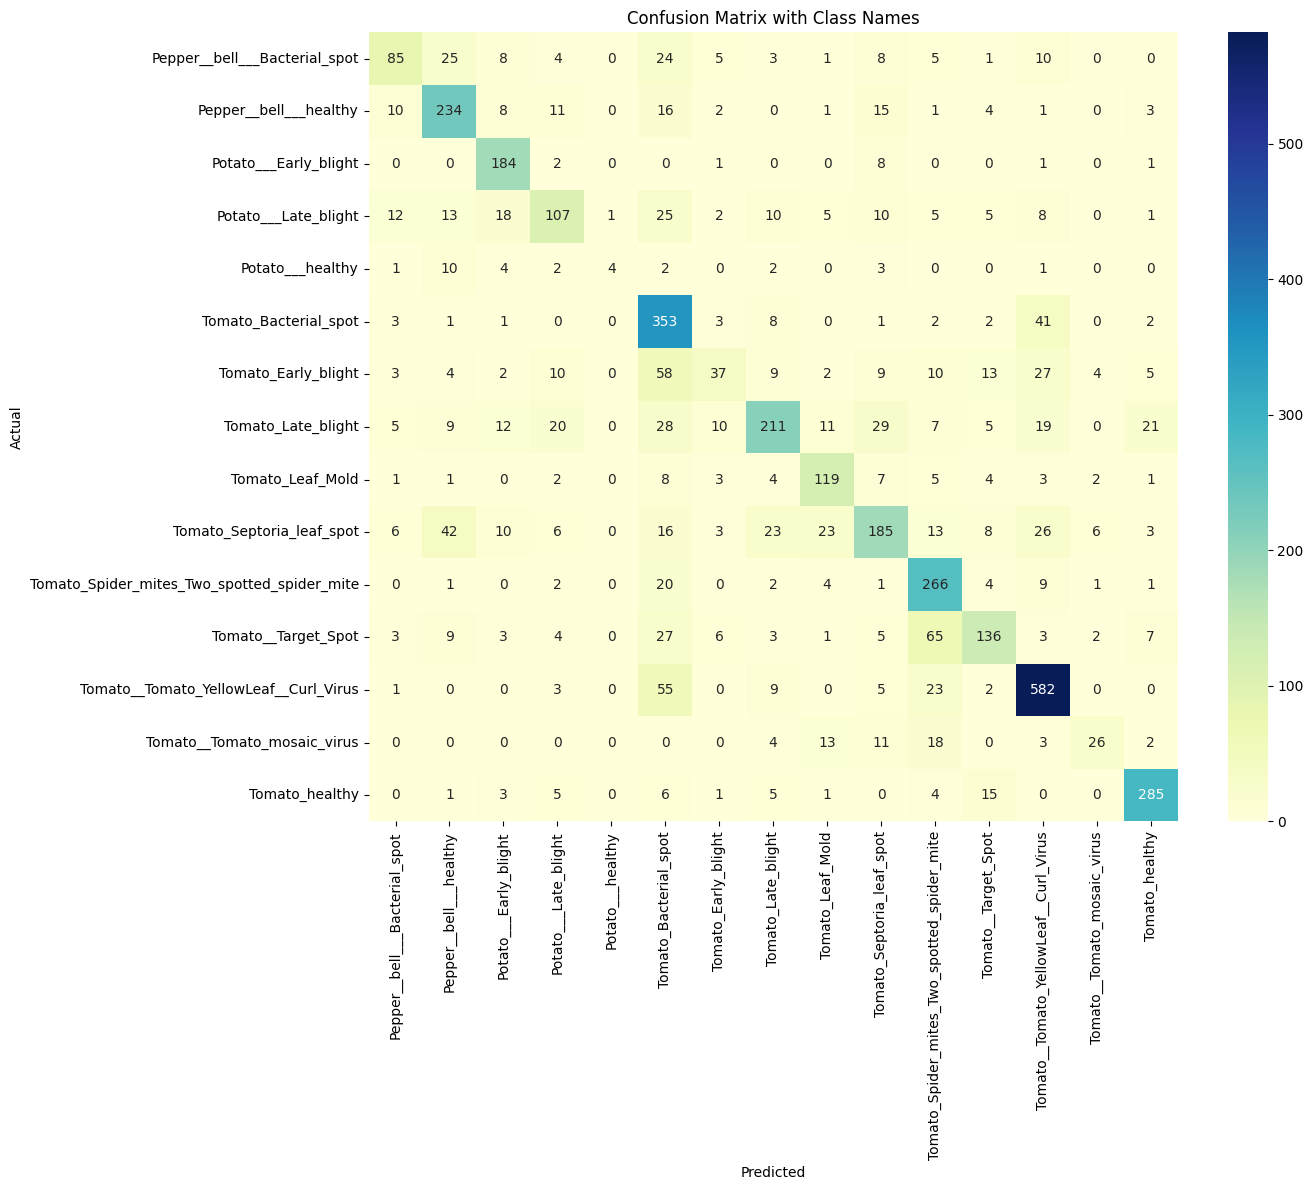

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Predict test labels
y_pred = knn.predict(X_test_pca)

# Step 2: Decode numerical labels back to original disease names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Step 3: Print accuracy and classification metrics
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))   # Displays class-wise performance

# Step 4: Generate and plot confusion matrix with class labels
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Class Names")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [59]:
# Select the first 1000 samples from the PCA-transformed training data
X_small = X_train_pca[:1000]
y_small = y_train[:1000]


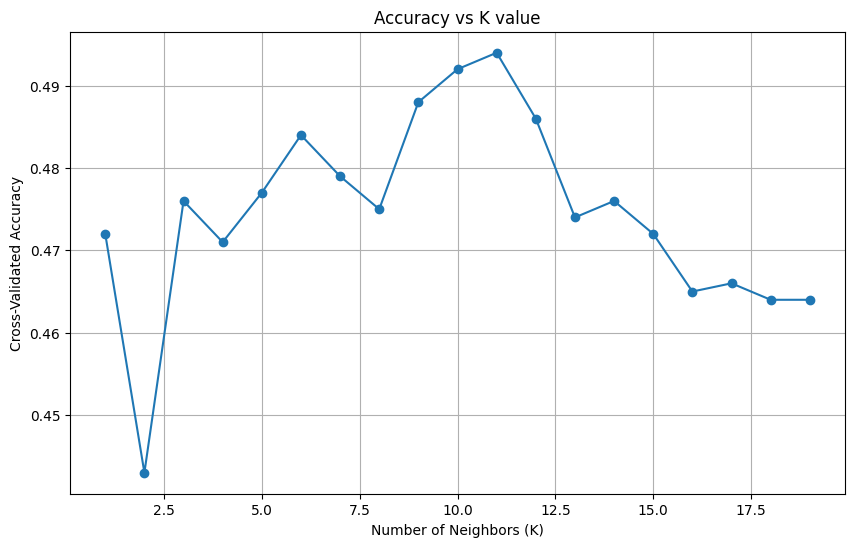

is the best k: 11 Accuracy: 0.4940


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = list(range(1, 20))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_small, y_small, cv=5)
    accuracies.append(scores.mean())

# عرض النتائج
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"is the best k: {best_k} Accuracy: {max(accuracies):.4f}")


# **Step 8: Predict on a New Image (Optional)**
This step demonstrates how to use the trained KNN model to classify a single, unseen image of a plant leaf. The image undergoes the same preprocessing pipeline (resize, scaling, PCA) as the training data to ensure consistency in feature space.


**Explanation:**

* `cv2.imread():` Reads the image from the given file path.

* `cv2.resize():` Ensures the input size matches what the model was trained on.

* `StandardScaler and PCA`: Preprocess the image exactly as done during training.

* `inverse_transform()`: Returns the human-readable class name rather than a numerical label.

This function allows the model to be used for real-time predictions on external images, making it applicable for practical plant disease detection tasks.

In [67]:
# Step 8: Predict on a new image (Optional)
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image to match training input size
    img_flat = img.reshape(1, -1)                # Flatten the image into a single row vector
    img_scaled = scaler.transform(img_flat)      # Apply the same StandardScaler used during training
    img_pca = pca.transform(img_scaled)          # Apply the trained PCA transformation
    pred = knn.predict(img_pca)                  # Predict using the trained KNN model
    return le.inverse_transform(pred)[0]         # Decode prediction back to original label


#Example usage:
print(predict_image("/content/Tomato_Early_blight.jpeg"))



Tomato_Early_blight
